In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset

df = pd.read_csv('/content/drive/My Drive/Project 2 (TPT)/time_clean.csv')
df.head()

,Unnamed: 0,time,moduleInletTemp__ch1,moduleOutletTemp__ch1,totalInletWater__ch1,totalOutletWater__ch1,moduleInletTemp__ch2,moduleOutletTemp__ch2,totalInletWater__ch2,totalOutletWater__ch2,...,water_in_temp__ir1,water_out_temp__ir1,supp_temp__ir2,return_temp__ir2,fan_speed__ir2,unt_airflow__ir2,water_flow__ir2,water_in_temp__ir2,water_out_temp__ir2,power
0,1,2024-07-16 10:41:10,15.1,15.2,15.1,15.2,14.9,15.1,14.9,15.1,...,15.070,14.960,20.075,21.835,247.3,62.0,10.5,15.455,20.515,244.86
1,2,2024-07-16 10:41:20,15.1,15.2,15.1,15.2,14.9,15.1,14.9,15.1,...,15.070,15.015,20.020,21.835,247.2,62.0,10.3,15.510,20.515,245.08
2,3,2024-07-16 10:41:30,15.1,15.2,15.1,15.2,14.9,15.1,14.9,15.1,...,15.070,14.960,19.965,21.780,247.2,62.0,10.3,15.455,20.460,245.30
3,4,2024-07-16 10:41:40,15.2,15.3,15.2,15.3,14.9,15.1,14.9,15.1,...,15.070,15.015,19.965,21.780,223.8,56.0,10.5,15.455,20.350,200.70
4,5,2024-07-16 10:41:50,15.2,15.3,15.2,15.3,15.0,15.1,15.0,15.1,...,15.015,15.015,19.910,21.835,231.1,58.0,10.3,15.565,20.350,223.10


In [4]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338151 entries, 0 to 338150
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             338151 non-null  int64  
 1   time                   338151 non-null  object 
 2   moduleInletTemp__ch1   338151 non-null  float64
 3   moduleOutletTemp__ch1  338151 non-null  float64
 4   totalInletWater__ch1   338151 non-null  float64
 5   totalOutletWater__ch1  338151 non-null  float64
 6   moduleInletTemp__ch2   338151 non-null  float64
 7   moduleOutletTemp__ch2  338151 non-null  float64
 8   totalInletWater__ch2   338151 non-null  float64
 9   totalOutletWater__ch2  338151 non-null  float64
 10  supp_temp__ir1         338151 non-null  float64
 11  return_temp__ir1       338151 non-null  float64
 12  fan_speed__ir1         338151 non-null  float64
 13  unt_airflow__ir1       338151 non-null  float64
 14  water_flow__ir1        338151 non-nu

In [5]:
# statistical info

df.describe()

,Unnamed: 0,moduleInletTemp__ch1,moduleOutletTemp__ch1,totalInletWater__ch1,totalOutletWater__ch1,moduleInletTemp__ch2,moduleOutletTemp__ch2,totalInletWater__ch2,totalOutletWater__ch2,supp_temp__ir1,...,water_in_temp__ir1,water_out_temp__ir1,supp_temp__ir2,return_temp__ir2,fan_speed__ir2,unt_airflow__ir2,water_flow__ir2,water_in_temp__ir2,water_out_temp__ir2,power
count,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,...,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000
mean,169133.772942,16.202258,15.598329,16.202258,15.598329,15.935705,15.807541,15.935705,15.807541,19.569290,...,15.753236,15.832144,19.807840,22.357740,229.852613,57.745407,10.506279,16.081691,20.316649,225.263443
std,97616.321580,1.209454,1.520875,1.209454,1.520875,1.211237,1.812179,1.211237,1.812179,0.310602,...,1.133890,1.070200,0.416161,0.527402,16.187048,3.872803,0.891289,1.105853,0.368469,313.947571
min,1.000000,13.100000,11.300000,13.100000,11.300000,12.900000,9.800000,12.900000,9.800000,17.325000,...,12.815000,13.255000,16.225000,20.185000,0.000000,0.000000,0.000000,13.145000,16.775000,133.440000
25%,84596.500000,15.300000,14.700000,15.300000,14.700000,15.000000,14.900000,15.000000,14.900000,19.360000,...,14.905000,15.015000,19.580000,21.890000,220.600000,56.000000,10.300000,15.290000,20.130000,203.760000
50%,169134.000000,16.200000,15.900000,16.200000,15.900000,15.900000,16.000000,15.900000,16.000000,19.525000,...,15.730000,15.785000,19.910000,22.385000,230.100000,58.000000,10.500000,16.115000,20.350000,225.000000
75%,253671.500000,17.200000,16.700000,17.200000,16.700000,16.900000,17.200000,16.900000,17.200000,19.855000,...,16.665000,16.665000,20.130000,22.825000,244.800000,61.000000,10.800000,16.940000,20.570000,245.300000
max,338209.000000,19.400000,19.100000,19.400000,19.100000,19.200000,19.400000,19.200000,19.400000,20.570000,...,18.810000,18.700000,21.670000,24.200000,254.100000,63.000000,12.400000,19.800000,22.440000,49017.960000


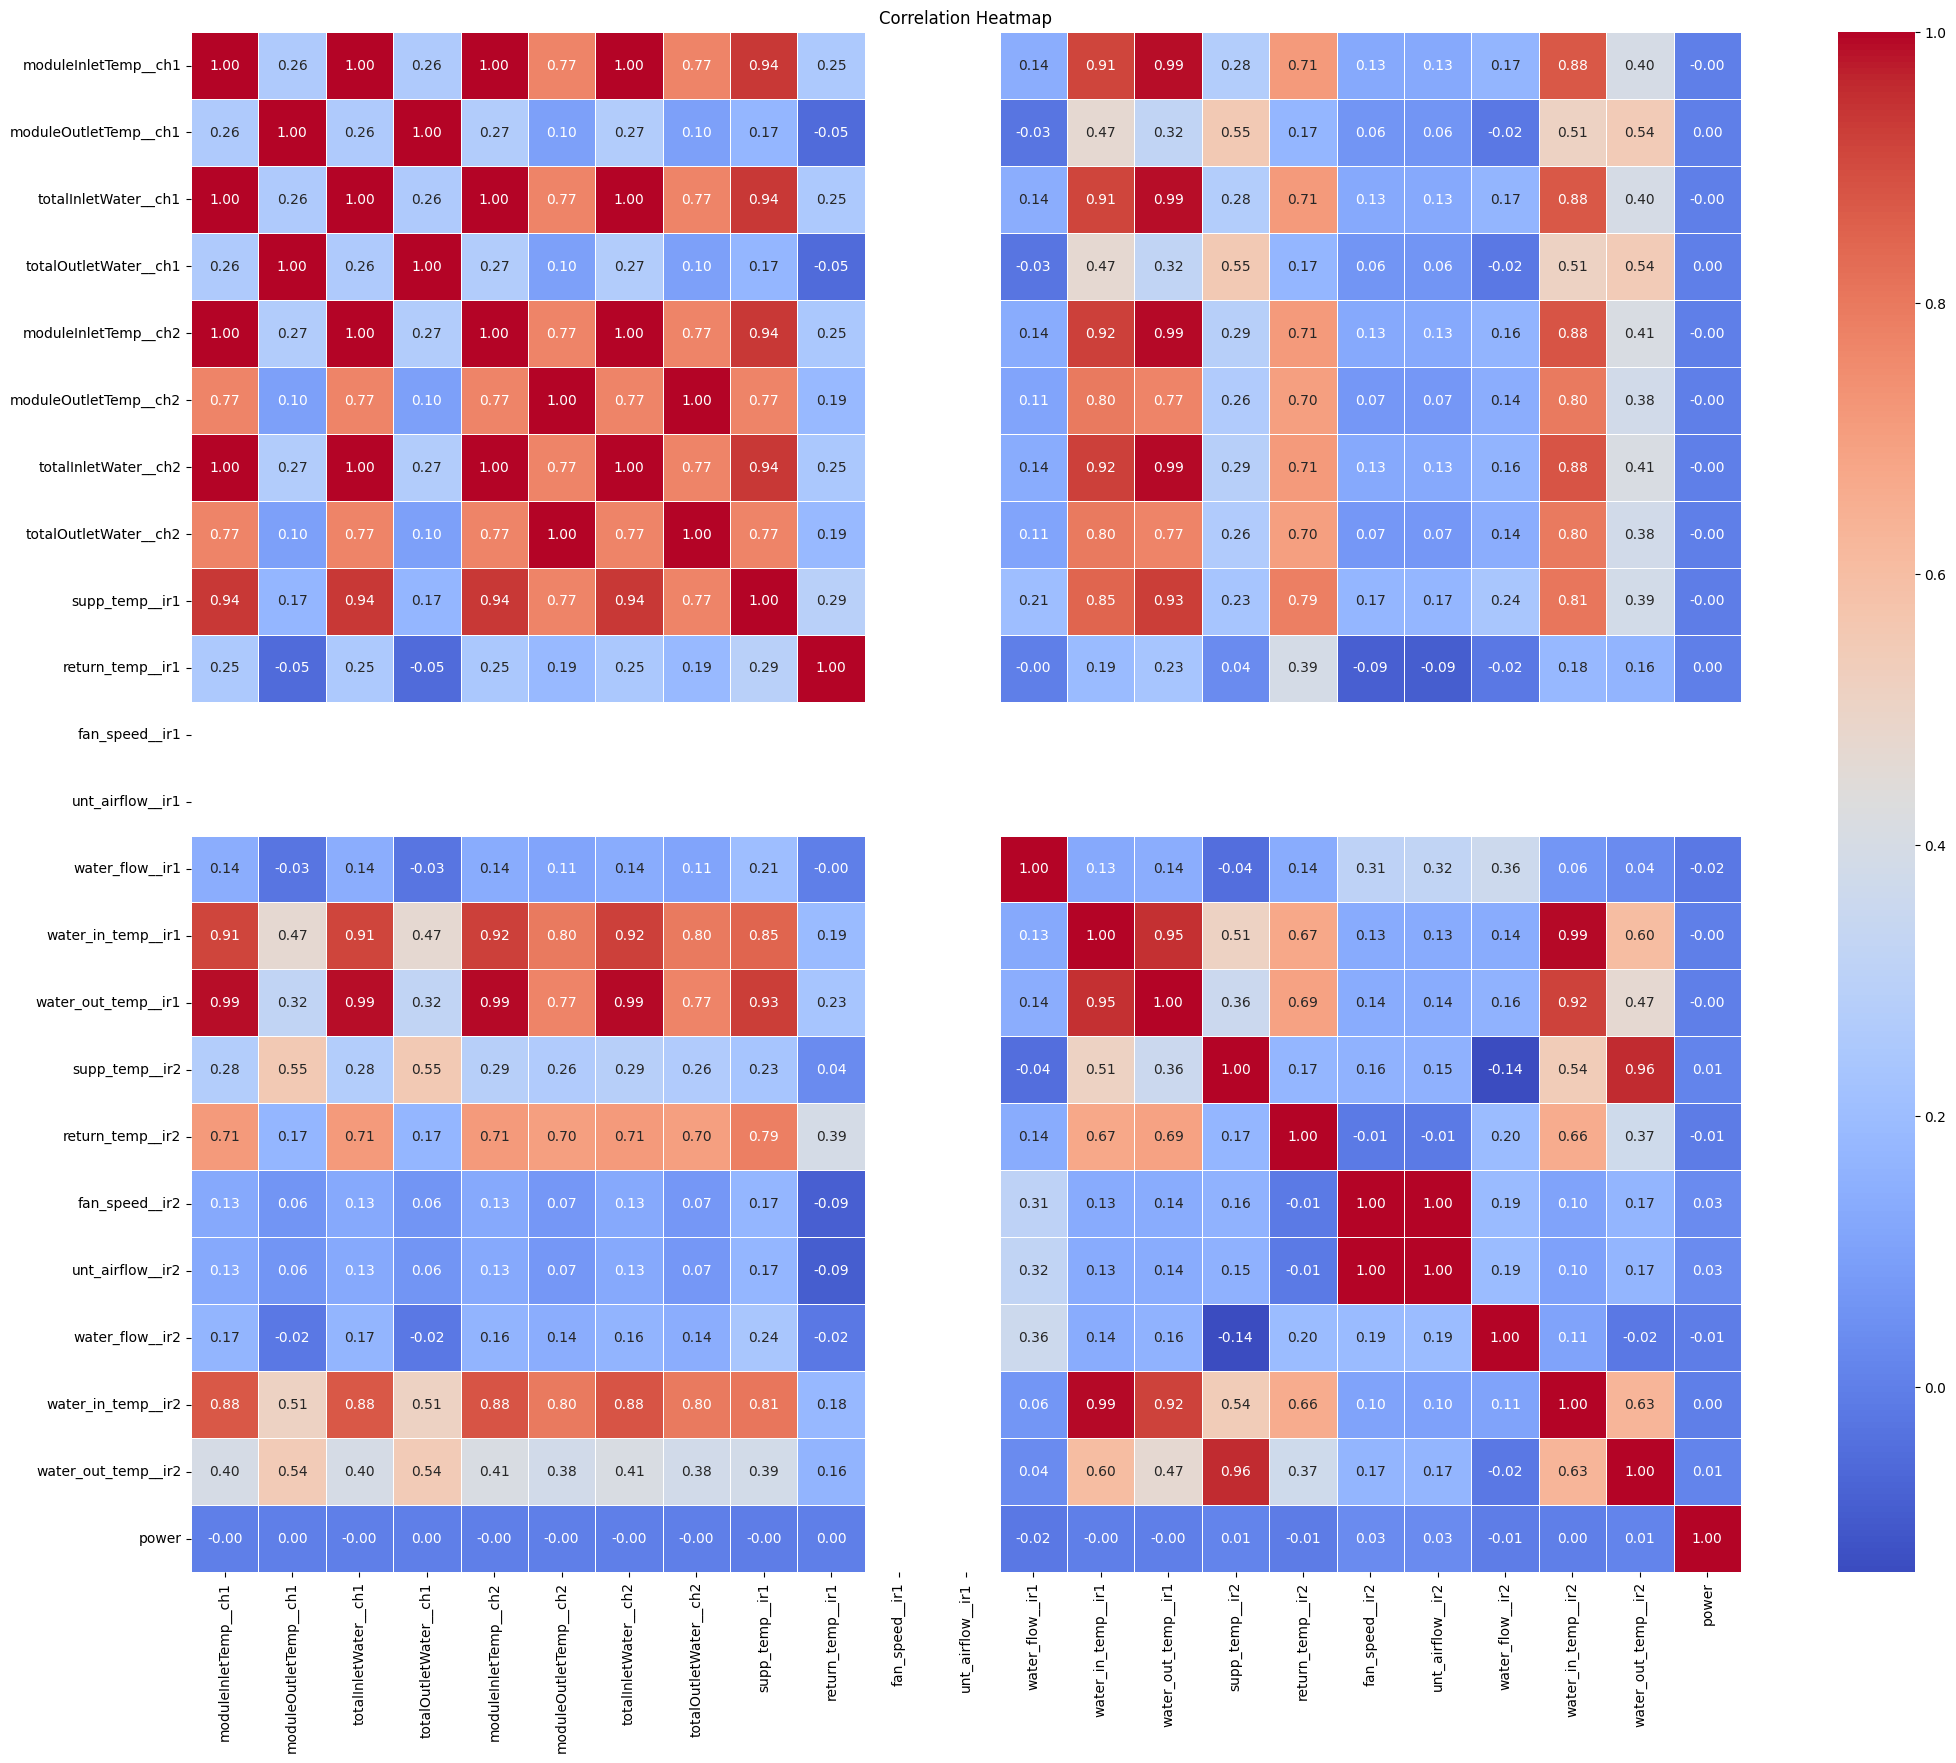

In [24]:
# data correlation

plt.figure(figsize=(25, 20))

sns.heatmap(df.drop(['Unnamed: 0', 'time'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Duplicated data checking

df.duplicated().sum()

0

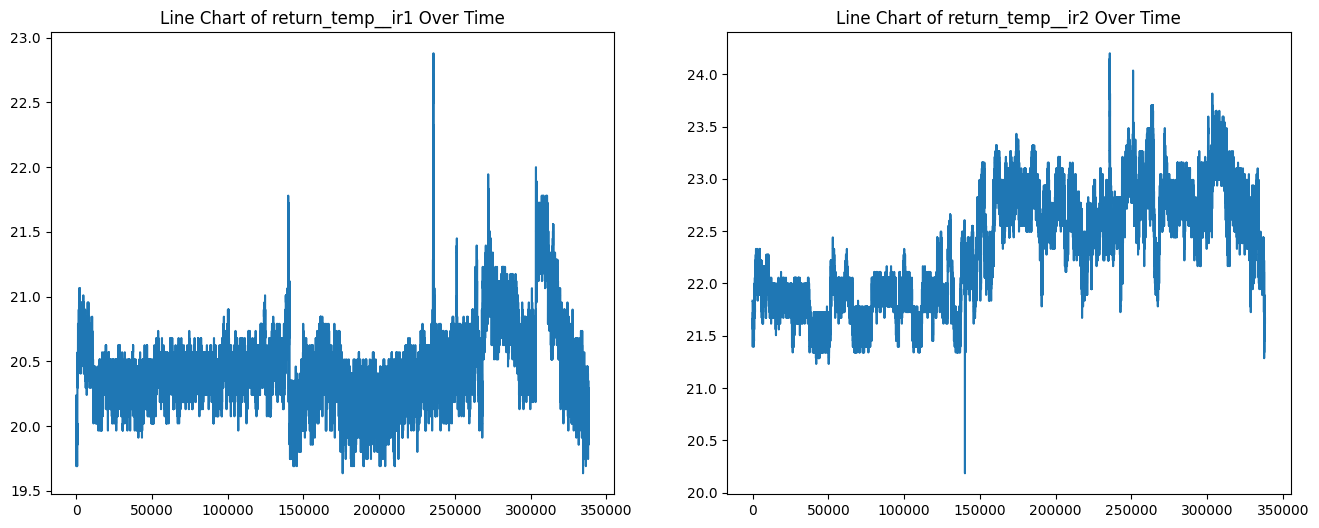

In [16]:
# Line Chart of return_temp (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['return_temp__ir1'])
ax1.set_title('Line Chart of return_temp__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['return_temp__ir2'])
ax2.set_title('Line Chart of return_temp__ir2 Over Time')

plt.show()

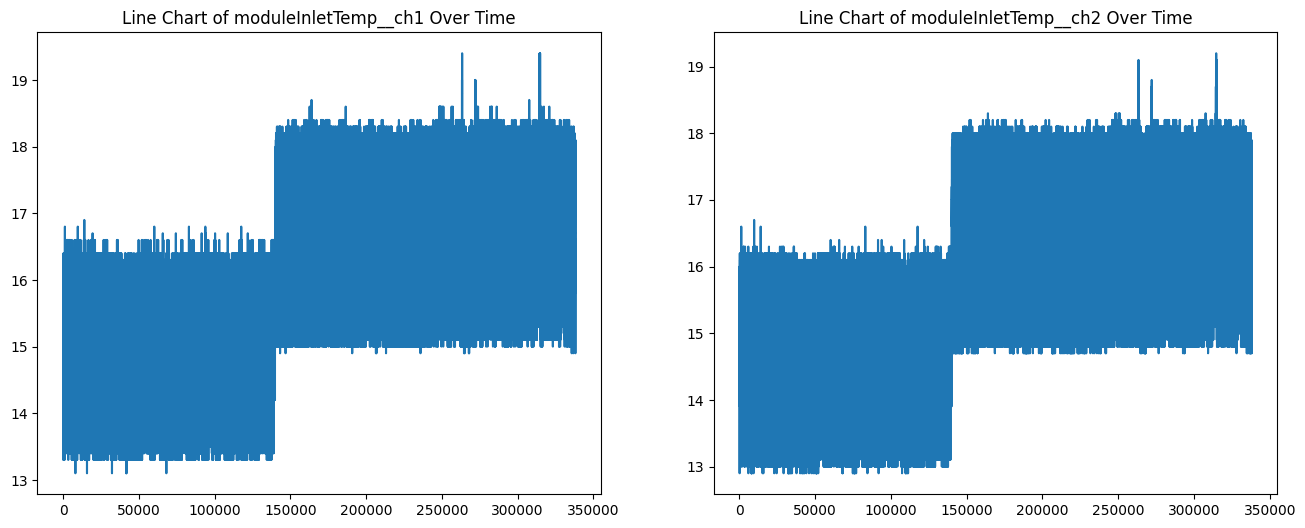

In [17]:
# Line Chart of moduleInletTemp (ch1 & ch2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['moduleInletTemp__ch1'])
ax1.set_title('Line Chart of moduleInletTemp__ch1 Over Time')

ax2.plot(df['Unnamed: 0'], df['moduleInletTemp__ch2'])
ax2.set_title('Line Chart of moduleInletTemp__ch2 Over Time')

plt.show()

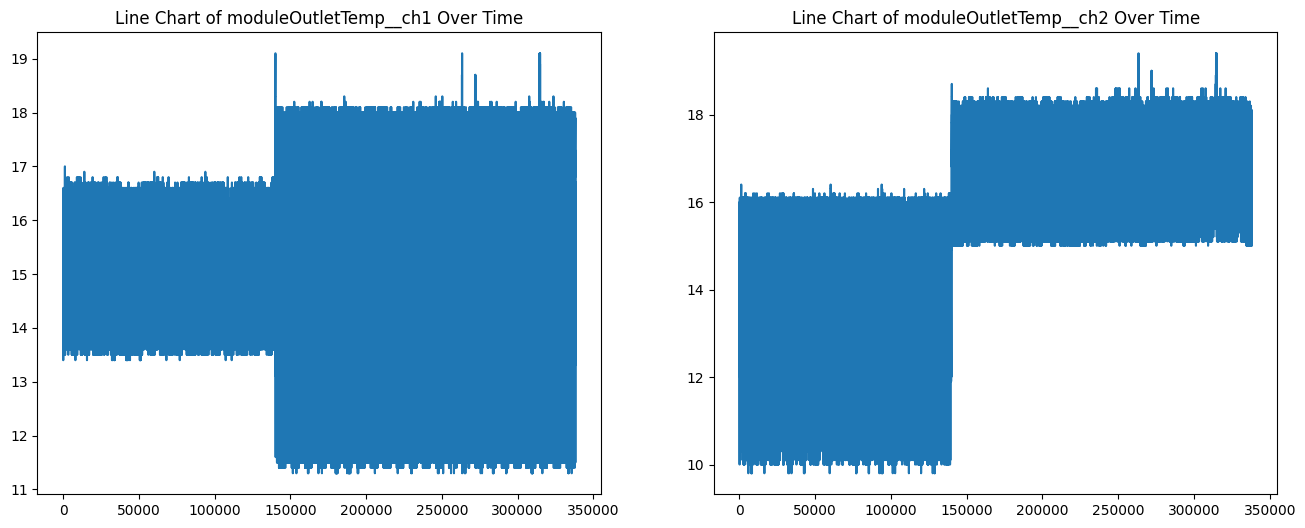

In [20]:
# Line Chart of moduleOutletTemp (ch1 & ch2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['moduleOutletTemp__ch1'])
ax1.set_title('Line Chart of moduleOutletTemp__ch1 Over Time')

ax2.plot(df['Unnamed: 0'], df['moduleOutletTemp__ch2'])
ax2.set_title('Line Chart of moduleOutletTemp__ch2 Over Time')

plt.show()

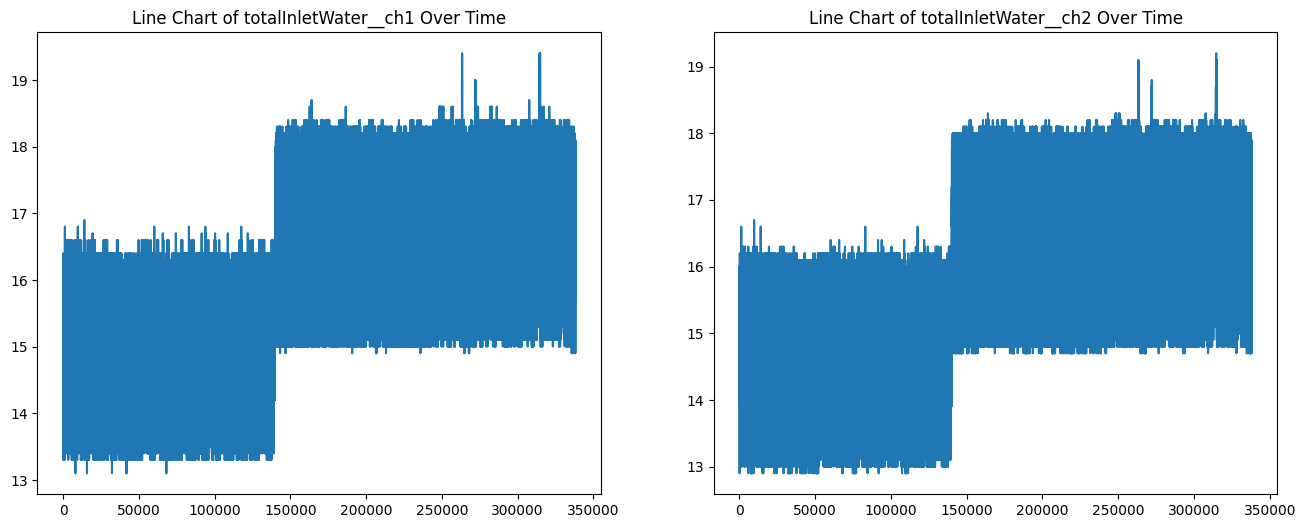

In [21]:
# Line Chart of totalInletWater (ch1 & ch2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['totalInletWater__ch1'])
ax1.set_title('Line Chart of totalInletWater__ch1 Over Time')

ax2.plot(df['Unnamed: 0'], df['totalInletWater__ch2'])
ax2.set_title('Line Chart of totalInletWater__ch2 Over Time')

plt.show()

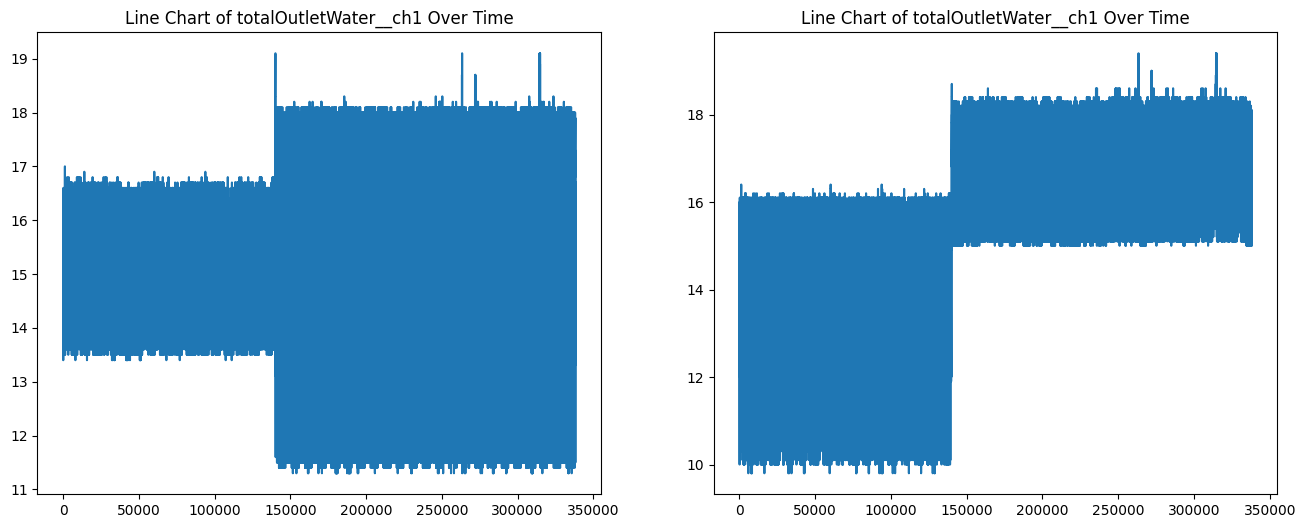

In [25]:
# Line Chart of totalOutletWater (ch1 & ch2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['totalOutletWater__ch1'])
ax1.set_title('Line Chart of totalOutletWater__ch1 Over Time')

ax2.plot(df['Unnamed: 0'], df['totalOutletWater__ch2'])
ax2.set_title('Line Chart of totalOutletWater__ch1 Over Time')

plt.show()

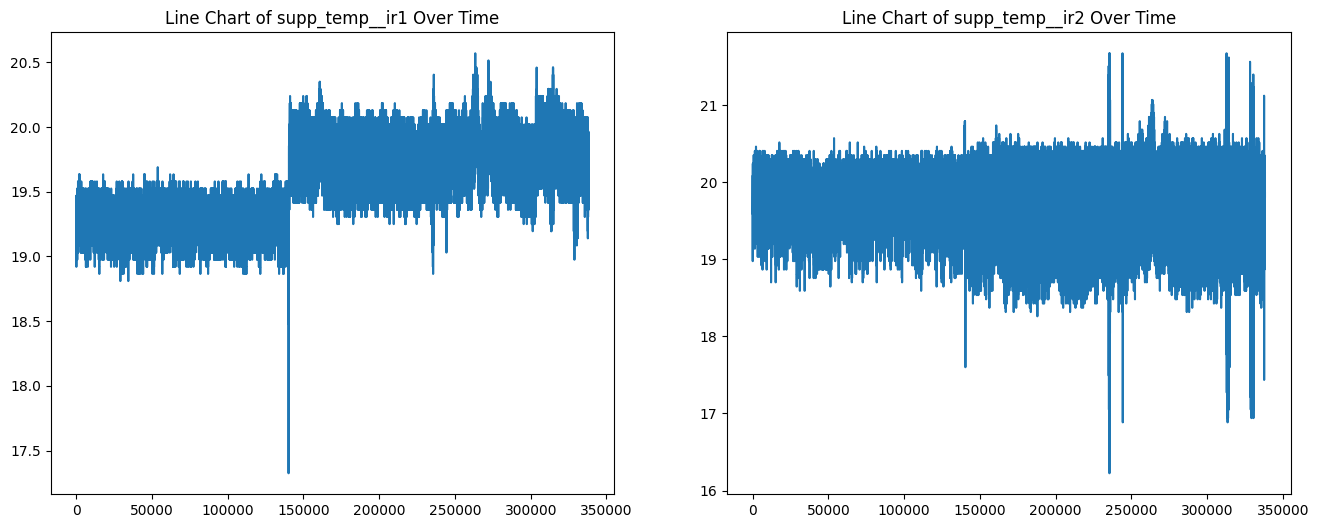

In [26]:
# Line Chart of supp_temp (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['supp_temp__ir1'])
ax1.set_title('Line Chart of supp_temp__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['supp_temp__ir2'])
ax2.set_title('Line Chart of supp_temp__ir2 Over Time')

plt.show()

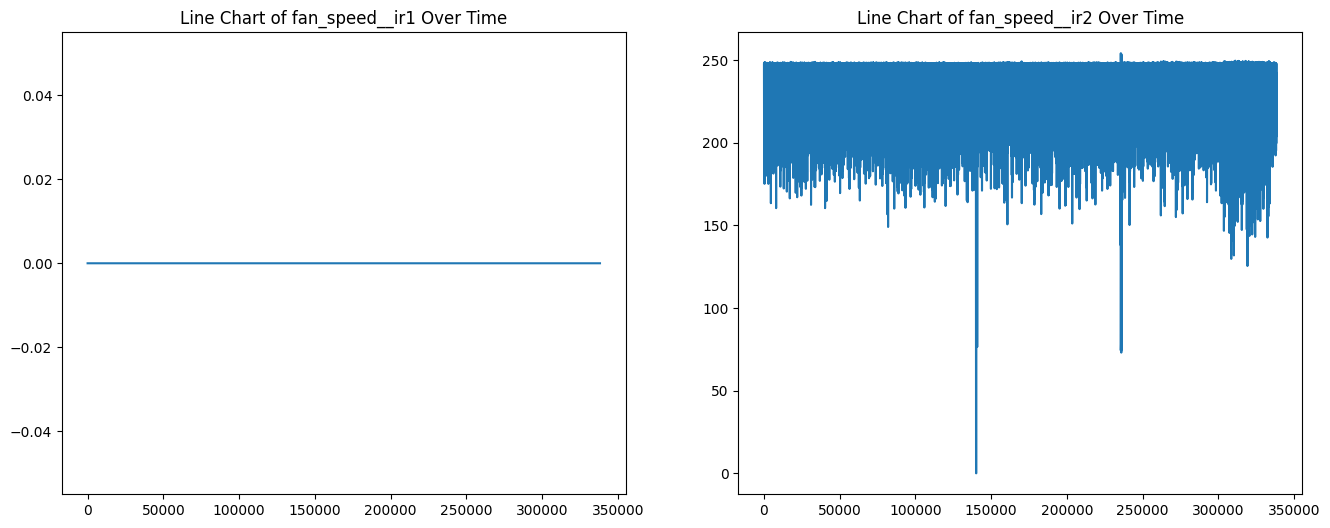

In [27]:
# Line Chart of fan_speed (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['fan_speed__ir1'])
ax1.set_title('Line Chart of fan_speed__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['fan_speed__ir2'])
ax2.set_title('Line Chart of fan_speed__ir2 Over Time')

plt.show()

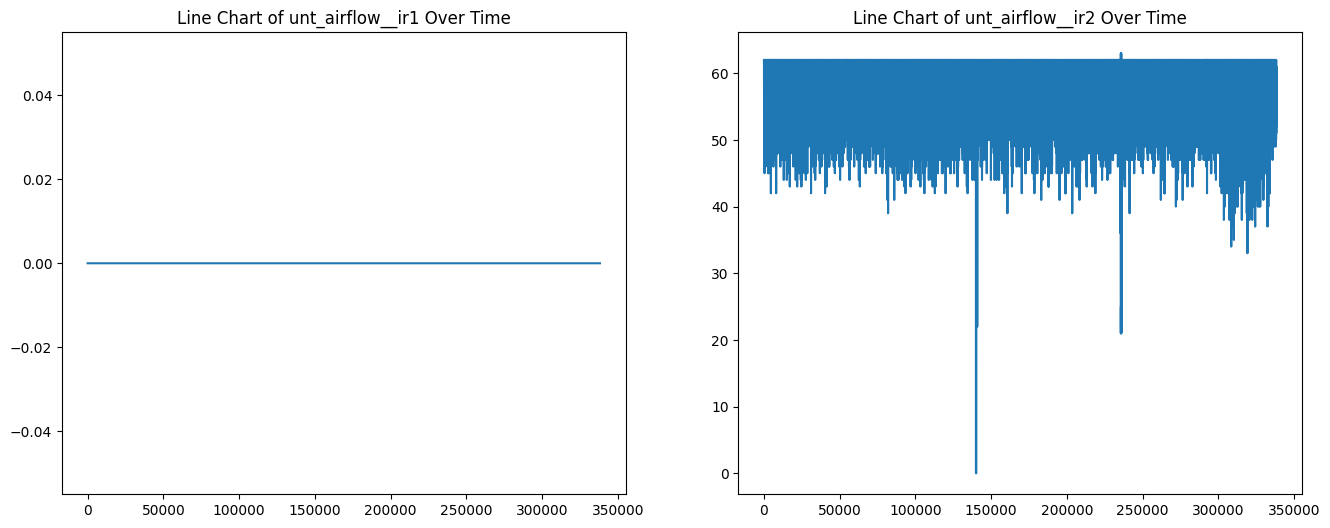

In [28]:
# Line Chart of unt_airflow (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['unt_airflow__ir1'])
ax1.set_title('Line Chart of unt_airflow__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['unt_airflow__ir2'])
ax2.set_title('Line Chart of unt_airflow__ir2 Over Time')

plt.show()

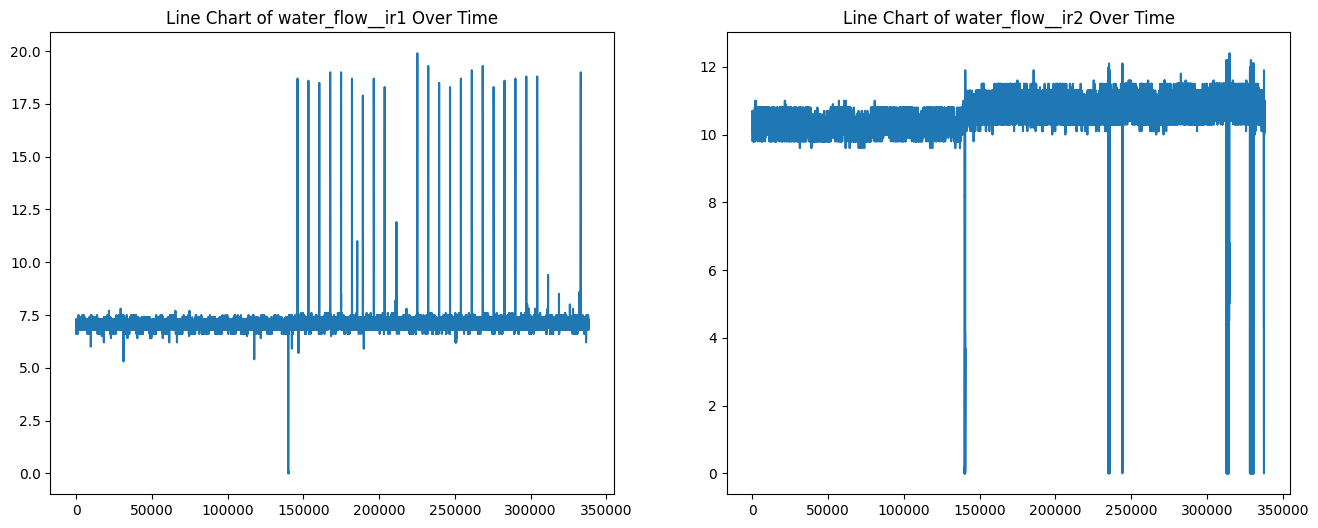

In [29]:
# Line Chart of water_flow (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['water_flow__ir1'])
ax1.set_title('Line Chart of water_flow__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['water_flow__ir2'])
ax2.set_title('Line Chart of water_flow__ir2 Over Time')

plt.show()

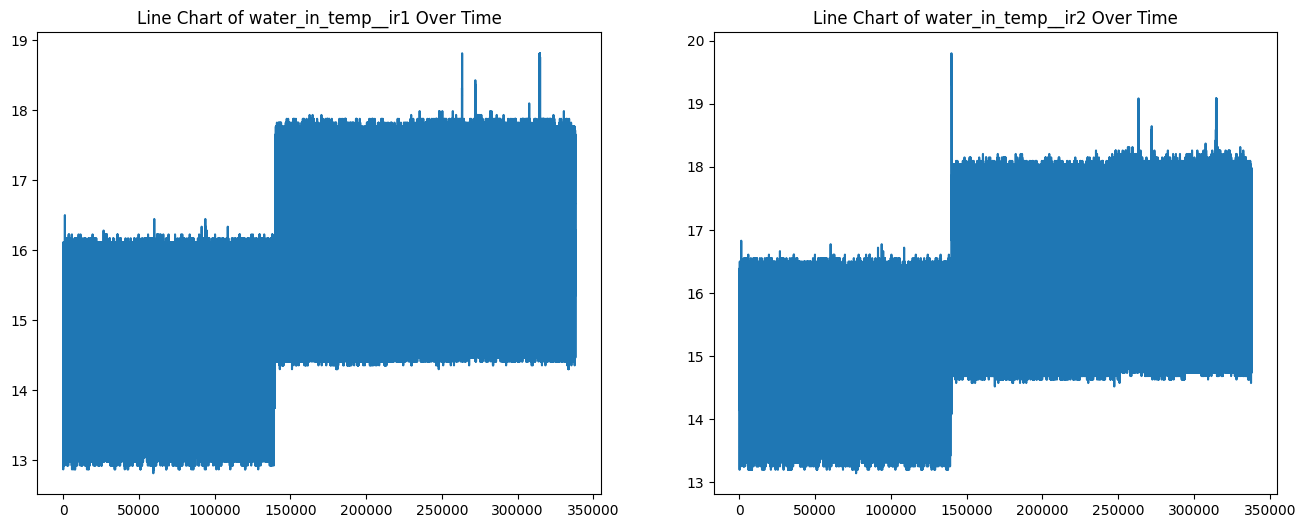

In [30]:
# Line Chart of water_in_temp (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['water_in_temp__ir1'])
ax1.set_title('Line Chart of water_in_temp__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['water_in_temp__ir2'])
ax2.set_title('Line Chart of water_in_temp__ir2 Over Time')

plt.show()

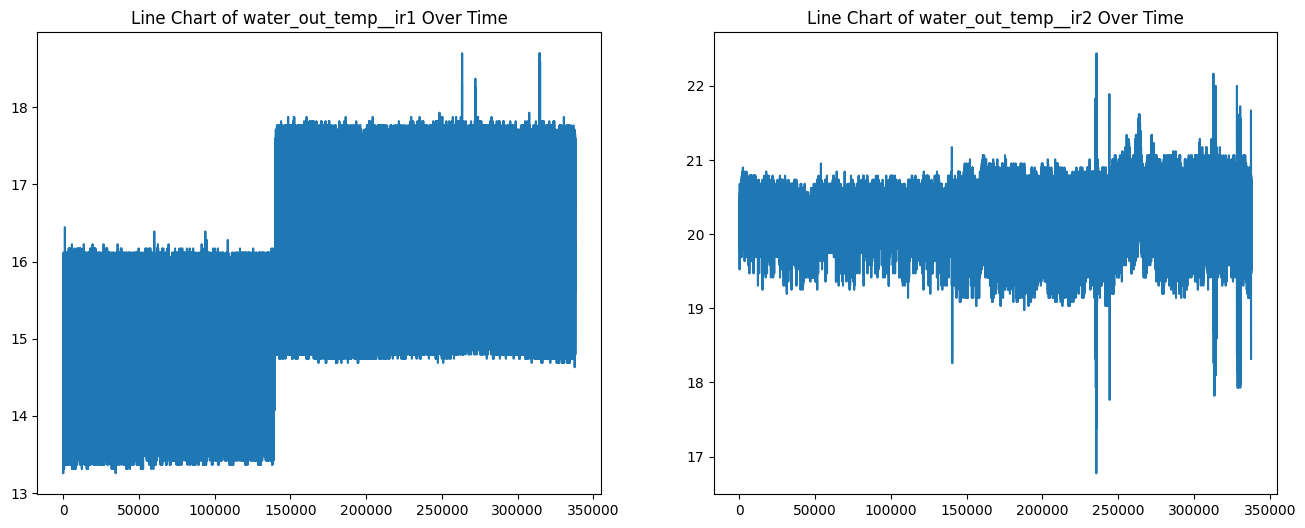

In [31]:
# Line Chart of water_out_temp (ir1 & ir2) Over Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

ax1.plot(df['Unnamed: 0'], df['water_out_temp__ir1'])
ax1.set_title('Line Chart of water_out_temp__ir1 Over Time')

ax2.plot(df['Unnamed: 0'], df['water_out_temp__ir2'])
ax2.set_title('Line Chart of water_out_temp__ir2 Over Time')

plt.show()

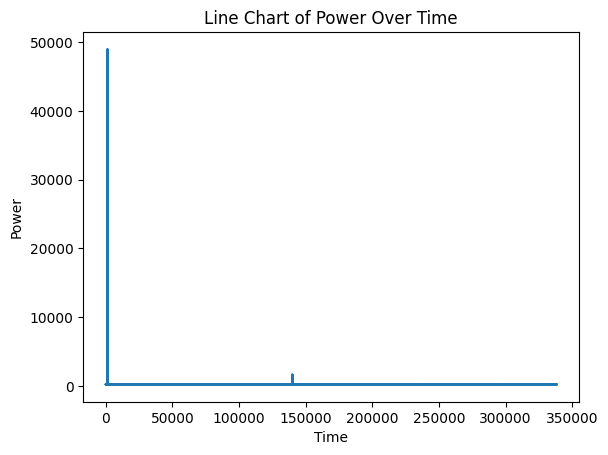

In [32]:
# Line Chart of Power Over Time

plt.plot(df['Unnamed: 0'], df['power'])
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Line Chart of Power Over Time')
plt.show()

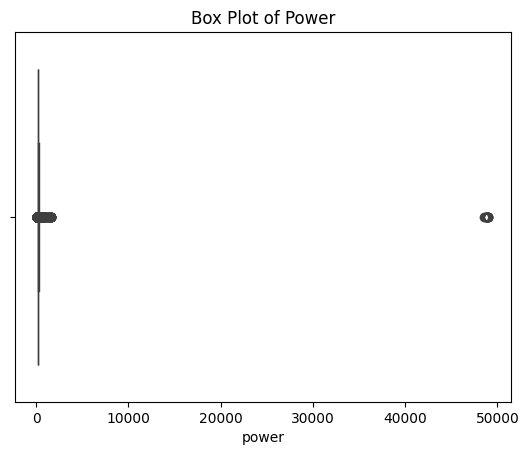

In [36]:
# Check Outlier in Power data

sns.boxplot(x=df['power'])  # Ganti 'power' dengan kolom yang ingin kamu visualisasikan
plt.title('Box Plot of Power')
plt.show()